In [1]:
from ase.io import read, write, Trajectory
import numpy as np

In [2]:
def CoM(clus):
    """
    Support function to set the origin of the cluster at the centre of the mass
    """
    (cx, cy, cz) = clus.get_center_of_mass()
    new_xyz = []
    for i, a in enumerate(clus):
        x, y, z = a.position
        x -= cx
        y -= cy
        z -= cz
        new_xyz.append((x, y, z))
    clus.set_positions(new_xyz)
    return clus

In [3]:
def checkSimilar(clus1, clus2):

    """Check whether two clusters are similar or not by comparing their moments of inertia"""
    Inertia1 = clus1.get_moments_of_inertia()
    Inertia2 = clus2.get_moments_of_inertia()
    # print(Inertia1, Inertia2, 'diff: ', Inertia1-Inertia2)

    tol = 0.01
    if (
        Inertia1[0] * (1 - tol) <= Inertia2[0] <= Inertia1[0] * (1 + tol)
        and Inertia1[1] * (1 - tol) <= Inertia2[1] <= Inertia1[1] * (1 + tol)
        and Inertia1[2] * (1 - tol) <= Inertia2[2] <= Inertia1[2] * (1 + tol)
    ):
        similar = True
    else:
        similar = False

    return similar

In [4]:
ini_gen = 0
end_gen = 25

In [5]:
ene_tol = 0.02
dist_tol = 0.02

num_check_similar = 0
diff_dist_abs_sum_list = []

non_similar_clus = []
similar_clus = []
non_similar_clus_ene_list = []
similar_clus_ene_list = []
non_similar_clus_diff_dist = []
similar_clus_diff_dist = []

n_traj1_list = []
n_traj2_list = []

for k in range(ini_gen, end_gen):
    file1  = 'mut_after_relax_gen'+str(k+1)+'.traj'
    file2  = 'vasp_mut_after_relax_gen'+str(k+1)+'.traj'

    traj1 = Trajectory(file1)
    traj2 = Trajectory(file2)
    
    n_traj1 = len(traj1)
    n_traj2 = len(traj2)
    n_traj1_list.append(n_traj1)
    n_traj2_list.append(n_traj2)
    
    for i in range(len(traj1)):
        num_check_similar = num_check_similar + 1
        clus1 = traj1[i]
        clus2 = traj2[i]
        
        ene1 = clus1.get_potential_energy()
        ene2 = clus2.get_potential_energy()
        diff_ene = ene1 - ene2
        
        dist1 = clus1.get_all_distances() 
        dist2 = clus2.get_all_distances()
        diff_dist = dist1 - dist2
        diff_dist_abs = np.absolute(diff_dist)
        diff_dist_avg = np.sum(diff_dist_abs) / len(diff_dist)**2
        
        inertia1 = clus1.get_moments_of_inertia()
        inertia2 = clus2.get_moments_of_inertia()
        diff_inertia = inertia1 - inertia2
              
        if checkSimilar(clus1, clus2) == True:
            #if (diff_dist_avg > dist_tol) or (abs(diff_ene) > ene_tol):
            if diff_dist_avg > dist_tol:
                #if abs(diff_ene) > ene_tol:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                #else:
                    #similar_clus.append((k,i))
                    #similar_clus_ene_list.append(diff_ene)
                    #similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                    
            
            else:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )  
                else:
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                
        else:
            if diff_dist_avg < dist_tol:
                if abs(diff_ene) < ene_tol:
                    similar_clus.append((k,i))
                    similar_clus_ene_list.append(diff_ene)
                    similar_clus_diff_dist.append(diff_dist_avg)
                    #print((k, i),diff_dist_avg, diff_ene, diff_inertia )
                else: 
                    non_similar_clus.append((k,i))
                    non_similar_clus_ene_list.append(diff_ene)
                    non_similar_clus_diff_dist.append(diff_dist_avg)
                    print((k, i),diff_dist_avg, diff_ene, diff_inertia )
            else:
                non_similar_clus.append((k,i))
                non_similar_clus_ene_list.append(diff_ene)
                non_similar_clus_diff_dist.append(diff_dist_avg)
                print((k, i),diff_dist_avg, diff_ene, diff_inertia )

print(len(non_similar_clus))
print(len(similar_clus))
print(num_check_similar)

#print(sorted(non_similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

print(n_traj1_list)
print(n_traj2_list)

(0, 0) 0.31009836339715713 -0.7989699700000017 [  851.52186779 -2191.91829894 -1096.24962513]
(0, 4) 0.3208674505453919 0.06861196000000547 [-230.92160594 -127.95233786  356.21900075]
(0, 7) 0.7449356071883532 0.07988587999999908 [ 118.02214554 -193.28362789   73.0094379 ]
(0, 8) 0.22154032595548545 -0.25434617999999887 [-116.08071083   74.84030404 -286.22179704]
(1, 2) 0.23354968113749858 -0.24520784000000617 [  550.02967805 -1193.89980195    95.59597354]
(1, 4) 0.25988695135905915 -0.40108838000000446 [ 549.75421221 -487.08737729 -687.55613538]
(1, 5) 0.5982387231278629 -0.4803089999999983 [  654.2292164   -892.33760335 -2543.16792975]
(1, 6) 0.32001740027975845 -1.659836999999996 [  636.86775237 -2429.91326781 -2518.48709874]
(1, 7) 0.4946414894512618 -1.1169071699999975 [ -680.78904812 -1429.09767341 -2636.23933034]
(1, 8) 0.5084456207165284 -0.3866827899999947 [ -749.55862797   564.49640478 -2327.45098425]
(1, 9) 0.06313870837466182 -0.038007690000000593 [ 34.21808831 -31.80388226

(17, 2) 0.027324703619079203 -0.004238120000003676 [ 69.99360666 -26.44081527 -17.07564508]
(17, 4) 0.2688970695684255 -0.5182230899999993 [ -56.90048193  323.0629896  -767.58328747]
(17, 6) 0.08848057027131791 -0.09151053999999448 [-130.37695393  483.72511914 -135.69018483]
(17, 7) 0.13071608442692859 -0.16004458999999827 [ 61.34253317 188.91360339  -0.67606471]
(17, 9) 0.14042800800779187 -0.028825259999997854 [ 204.06734331   53.65140036 -323.36220039]
(18, 0) 0.02470380854677598 -0.002156310000003714 [-56.63021651  20.43822228  55.59755413]
(18, 6) 0.04858391298417526 -0.037831849999996336 [-91.98191986  99.14100199   9.88545926]
(18, 7) 0.6092048085950024 -0.06379307000000267 [-1113.5519425    733.67971452  1624.46558128]
(18, 8) 0.15044999883837243 -0.017332379999999148 [104.49951091 -53.53058095 159.25224913]
(18, 9) 0.13971647951448113 -0.04511398999999727 [ 325.64872368  156.96438935 -755.27571376]
(19, 2) 0.3622085547175791 -0.2597196199999985 [-541.15809013  730.84988328  21

In [6]:
filename="clus_Pd16.log"

parent_calls_list = []
with open(filename, 'r') as fh:
    for line in fh:
        if line.startswith("Parent"):
            line = line.strip()
            words = line.split(':')
            words[1] = words[1].lstrip()
            parent_calls_list.append(words[1])
#print(parent_calls_list)
#print((parent_calls_list[0]))

item_split = []
for item in parent_calls_list:
    print( item)
    item_split.append(item.split(","))
#print(item_split)

#print(item_split[0])


[10, 8, 9, 11, 13, 4, 11, 33, 11, 10]
[14, 7, 12, 13, 8, 28, 17, 39, 15, 11]
[10, 18, 10, 16, 14, 7, 15, 10, 7, 16]
[11, 10, 18, 13, 11, 15, 18, 22, 14, 18]
[19, 15, 16, 13, 9, 9, 24, 17, 9, 13]
[5, 7, 13, 20, 8, 17, 9, 19, 14, 7]
[5, 16, 7, 13, 10, 12, 6, 13, 17]
[16, 14, 11, 23, 17, 5, 19, 16, 11, 12]
[8, 7, 24, 8, 21, 26, 22, 11, 19, 22]
[15, 22, 8, 6, 19, 22, 9, 11, 10, 13]
[9, 11, 13, 18, 16, 13, 17, 5, 10, 12]
[5, 12, 17, 9, 10, 9, 30, 8, 8, 10]
[20, 4, 10, 7, 18, 10, 7, 12, 7, 7]
[5, 15, 16, 10, 12, 10, 11, 13, 9]
[14, 23, 15, 8, 10, 17, 9, 22, 10, 17]
[7, 16, 17, 50, 11, 13, 12, 4, 26, 17]
[18, 8, 10, 11, 10, 18, 9, 17, 19, 19]
[10, 19, 11, 12, 9, 8, 8, 15, 9, 9]
[11, 5, 10, 8, 5, 13, 9, 10, 12, 10]
[12, 15, 10, 8, 23, 18, 6, 13, 9, 15]
[15, 11, 14, 24, 9, 10, 9, 10, 13, 15]
[13, 12, 13, 14, 14, 21, 11, 14, 12, 10]
[18, 17, 10, 4, 11, 5, 22, 12, 16]
[9, 16, 16, 4, 10, 5, 13, 12, 10, 14]
[9, 14, 5, 14, 14, 4, 8, 18]


In [7]:
new_vasp_calls = []
len_new_vasp_calls = []
for i in range(len(item_split)):
    k=len(item_split[i])
    new_int_list = []
    
    a = list(item_split[i][0].lstrip())
    del a[0] 
    a = int(''.join(a))
    new_int_list.append(a)
    #print(a)
    for k in range(1,(len(item_split[i])-1)):
        b = int(item_split[i][k])
        new_int_list.append(b)
        #print(b)  
    c = list(item_split[i][-1].lstrip())
    del c[-1]
    c = int(''.join(c))
    new_int_list.append(c)
    #print(c)
    #print(new_int_list)
    len_new_list = len(new_int_list)
    new_vasp_calls.append(new_int_list)
    len_new_vasp_calls.append(len_new_list)
print(new_vasp_calls)
print(len(new_vasp_calls))
print(len_new_vasp_calls)
print(sum(len_new_vasp_calls))

[[10, 8, 9, 11, 13, 4, 11, 33, 11, 10], [14, 7, 12, 13, 8, 28, 17, 39, 15, 11], [10, 18, 10, 16, 14, 7, 15, 10, 7, 16], [11, 10, 18, 13, 11, 15, 18, 22, 14, 18], [19, 15, 16, 13, 9, 9, 24, 17, 9, 13], [5, 7, 13, 20, 8, 17, 9, 19, 14, 7], [5, 16, 7, 13, 10, 12, 6, 13, 17], [16, 14, 11, 23, 17, 5, 19, 16, 11, 12], [8, 7, 24, 8, 21, 26, 22, 11, 19, 22], [15, 22, 8, 6, 19, 22, 9, 11, 10, 13], [9, 11, 13, 18, 16, 13, 17, 5, 10, 12], [5, 12, 17, 9, 10, 9, 30, 8, 8, 10], [20, 4, 10, 7, 18, 10, 7, 12, 7, 7], [5, 15, 16, 10, 12, 10, 11, 13, 9], [14, 23, 15, 8, 10, 17, 9, 22, 10, 17], [7, 16, 17, 50, 11, 13, 12, 4, 26, 17], [18, 8, 10, 11, 10, 18, 9, 17, 19, 19], [10, 19, 11, 12, 9, 8, 8, 15, 9, 9], [11, 5, 10, 8, 5, 13, 9, 10, 12, 10], [12, 15, 10, 8, 23, 18, 6, 13, 9, 15], [15, 11, 14, 24, 9, 10, 9, 10, 13, 15], [13, 12, 13, 14, 14, 21, 11, 14, 12, 10], [18, 17, 10, 4, 11, 5, 22, 12, 16], [9, 16, 16, 4, 10, 5, 13, 12, 10, 14], [9, 14, 5, 14, 14, 4, 8, 18]]
25
[10, 10, 10, 10, 10, 10, 9, 10, 10

In [8]:
print(len(similar_clus))
print(similar_clus)

81
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 9), (1, 0), (1, 1), (1, 3), (2, 0), (2, 5), (2, 8), (3, 0), (3, 1), (3, 4), (5, 0), (5, 1), (5, 4), (5, 9), (6, 0), (6, 2), (6, 3), (6, 4), (6, 6), (7, 2), (7, 5), (8, 0), (8, 1), (9, 2), (9, 3), (10, 5), (10, 7), (10, 8), (11, 0), (11, 3), (11, 8), (11, 9), (12, 1), (12, 3), (12, 5), (12, 6), (12, 8), (12, 9), (13, 0), (13, 8), (14, 0), (14, 6), (15, 0), (15, 7), (16, 1), (16, 2), (16, 3), (16, 6), (17, 0), (17, 3), (17, 5), (17, 8), (18, 1), (18, 2), (18, 3), (18, 4), (18, 5), (19, 0), (19, 1), (19, 6), (19, 8), (20, 1), (20, 6), (20, 9), (21, 1), (22, 3), (22, 4), (22, 5), (23, 0), (23, 3), (23, 5), (23, 6), (24, 1), (24, 2), (24, 5), (24, 6)]


In [9]:
file_vasp="results_all.log"

vasp_calls = []
vasp_calls_list = []
with open(file_vasp, 'r') as fh:
    total_images = []
    for line in fh:       
        if "VASP Calls" in line:
            line = line.strip()
            words = line.split(':')
            words[1] = int(words[1].lstrip())
            vasp_calls.append(words[1])
        if "Total images in the trajectory" in line:
            line = line.strip()
            img_num = line.split(':')
            img_num[1] = int(img_num[1].lstrip())
            total_images.append(img_num[1])

print(vasp_calls)
#print(len(vasp_calls))
#print(total_images)
#print(len(total_images))
#print(sum(total_images))
print('\n')

kk = 0
for i in total_images:
    traj_calls = []
    for j in range(kk, kk+i):
        traj_calls.append(vasp_calls[j])
    vasp_calls_list.append(traj_calls)
    kk = kk + i

print(vasp_calls_list)

[16, 13, 15, 66, 52, 7, 15, 23, 15, 9, 21, 15, 17, 15, 13, 33, 9, 15, 21, 19, 23, 21, 51, 65, 36, 15, 38, 50, 13, 13, 13, 19, 100, 11, 13, 17, 21, 60, 19, 15, 13, 15, 26, 66, 6, 37, 48, 15, 23, 27, 11, 25, 18, 17, 11, 36, 27, 13, 26, 13, 11, 11, 13, 17, 23, 39, 13, 19, 13, 9, 109, 61, 133, 43, 11, 23, 23, 24, 50, 17, 12, 19, 85, 16, 93, 24, 21, 33, 21, 29, 101, 13, 13, 17, 41, 14, 17, 15, 17, 14, 54, 75, 76, 71, 43, 17, 11, 15, 21, 11, 47, 23, 13, 76, 9, 29, 8, 13, 12, 57, 9, 77, 12, 24, 11, 10, 9, 11, 19, 11, 27, 40, 15, 42, 42, 11, 31, 11, 13, 11, 36, 39, 21, 21, 13, 73, 15, 153, 17, 21, 40, 17, 9, 17, 61, 9, 34, 30, 53, 11, 15, 15, 9, 22, 26, 79, 33, 20, 11, 70, 26, 25, 26, 13, 70, 21, 21, 45, 25, 5, 19, 11, 16, 32, 15, 27, 19, 45, 43, 31, 24, 20, 79, 21, 13, 15, 17, 44, 17, 17, 46, 69, 29, 35, 17, 14, 23, 25, 46, 28, 31, 19, 28, 19, 32, 35, 15, 21, 13, 34, 68, 15, 15, 9, 24, 9, 23, 13, 34, 19, 15, 16, 9, 19, 23, 19, 66, 17, 19, 9, 40, 15, 7, 11, 63]


[[16, 13, 15, 66, 52, 7, 15, 2

In [10]:
print(new_vasp_calls)

[[10, 8, 9, 11, 13, 4, 11, 33, 11, 10], [14, 7, 12, 13, 8, 28, 17, 39, 15, 11], [10, 18, 10, 16, 14, 7, 15, 10, 7, 16], [11, 10, 18, 13, 11, 15, 18, 22, 14, 18], [19, 15, 16, 13, 9, 9, 24, 17, 9, 13], [5, 7, 13, 20, 8, 17, 9, 19, 14, 7], [5, 16, 7, 13, 10, 12, 6, 13, 17], [16, 14, 11, 23, 17, 5, 19, 16, 11, 12], [8, 7, 24, 8, 21, 26, 22, 11, 19, 22], [15, 22, 8, 6, 19, 22, 9, 11, 10, 13], [9, 11, 13, 18, 16, 13, 17, 5, 10, 12], [5, 12, 17, 9, 10, 9, 30, 8, 8, 10], [20, 4, 10, 7, 18, 10, 7, 12, 7, 7], [5, 15, 16, 10, 12, 10, 11, 13, 9], [14, 23, 15, 8, 10, 17, 9, 22, 10, 17], [7, 16, 17, 50, 11, 13, 12, 4, 26, 17], [18, 8, 10, 11, 10, 18, 9, 17, 19, 19], [10, 19, 11, 12, 9, 8, 8, 15, 9, 9], [11, 5, 10, 8, 5, 13, 9, 10, 12, 10], [12, 15, 10, 8, 23, 18, 6, 13, 9, 15], [15, 11, 14, 24, 9, 10, 9, 10, 13, 15], [13, 12, 13, 14, 14, 21, 11, 14, 12, 10], [18, 17, 10, 4, 11, 5, 22, 12, 16], [9, 16, 16, 4, 10, 5, 13, 12, 10, 14], [9, 14, 5, 14, 14, 4, 8, 18]]


In [11]:
print(similar_clus)

[(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 9), (1, 0), (1, 1), (1, 3), (2, 0), (2, 5), (2, 8), (3, 0), (3, 1), (3, 4), (5, 0), (5, 1), (5, 4), (5, 9), (6, 0), (6, 2), (6, 3), (6, 4), (6, 6), (7, 2), (7, 5), (8, 0), (8, 1), (9, 2), (9, 3), (10, 5), (10, 7), (10, 8), (11, 0), (11, 3), (11, 8), (11, 9), (12, 1), (12, 3), (12, 5), (12, 6), (12, 8), (12, 9), (13, 0), (13, 8), (14, 0), (14, 6), (15, 0), (15, 7), (16, 1), (16, 2), (16, 3), (16, 6), (17, 0), (17, 3), (17, 5), (17, 8), (18, 1), (18, 2), (18, 3), (18, 4), (18, 5), (19, 0), (19, 1), (19, 6), (19, 8), (20, 1), (20, 6), (20, 9), (21, 1), (22, 3), (22, 4), (22, 5), (23, 0), (23, 3), (23, 5), (23, 6), (24, 1), (24, 2), (24, 5), (24, 6)]


In [12]:
same_clus_almlp = []
same_clus_vasp = []
same_clus_diff = []
for i in range(len(similar_clus)):
    p = similar_clus[i][0]
    q = similar_clus[i][1]
    
    r = new_vasp_calls[p][q] #clus_XXX.log AL
    same_clus_almlp.append(r)
    s = vasp_calls_list[p][q] #results.log DFT
    same_clus_vasp.append(s)
    
    same_clus_diff.append(s-r)
    #print(r, s, s-r)
print(same_clus_almlp)
print(sum(same_clus_almlp))
print(same_clus_vasp)
print(sum(same_clus_vasp))
print(same_clus_diff)
print(sum(same_clus_diff))
print(len(same_clus_diff))

[8, 9, 11, 4, 11, 10, 14, 7, 13, 10, 7, 7, 11, 10, 11, 5, 7, 8, 7, 5, 7, 13, 10, 6, 11, 5, 8, 7, 8, 6, 13, 5, 10, 5, 9, 8, 10, 4, 7, 10, 7, 7, 7, 5, 9, 14, 9, 7, 4, 8, 10, 11, 9, 10, 12, 8, 9, 5, 10, 8, 5, 13, 12, 15, 6, 9, 11, 9, 15, 12, 4, 11, 5, 9, 4, 5, 13, 14, 5, 4, 8]
695
[13, 15, 66, 7, 15, 9, 21, 15, 15, 23, 15, 13, 13, 19, 13, 11, 25, 11, 13, 11, 13, 17, 23, 13, 61, 11, 17, 12, 13, 13, 43, 11, 15, 11, 13, 13, 12, 9, 12, 11, 10, 11, 19, 11, 11, 13, 13, 17, 9, 11, 15, 15, 26, 11, 25, 13, 21, 5, 19, 11, 16, 32, 43, 31, 13, 17, 17, 17, 25, 28, 15, 15, 9, 13, 15, 9, 19, 19, 9, 7, 11]
1352
[5, 6, 55, 3, 4, -1, 7, 8, 2, 13, 8, 6, 2, 9, 2, 6, 18, 3, 6, 6, 6, 4, 13, 7, 50, 6, 9, 5, 5, 7, 30, 6, 5, 6, 4, 5, 2, 5, 5, 1, 3, 4, 12, 6, 2, -1, 4, 10, 5, 3, 5, 4, 17, 1, 13, 5, 12, 0, 9, 3, 11, 19, 31, 16, 7, 8, 6, 8, 10, 16, 11, 4, 4, 4, 11, 4, 6, 5, 4, 3, 3]
657
81


(0.0, 0.025)

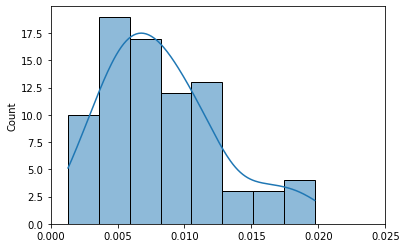

In [13]:
import seaborn as sns
g = sns.histplot(similar_clus_diff_dist, kde=True)
g.set_xlim(0.0, 0.025)

<AxesSubplot:ylabel='Count'>

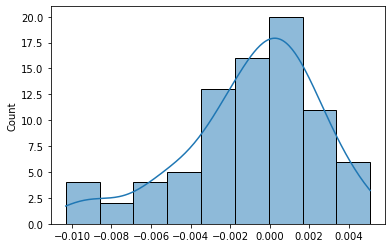

In [14]:
sns.histplot(similar_clus_ene_list, kde=True)

In [15]:
print(sorted(similar_clus_ene_list))
#print(non_similar_clus)
#print(sorted(non_similar_clus_ene_list))
#print(sorted(non_similar_clus_diff_dist))

[-0.010312609999999722, -0.009476999999996849, -0.00928404999999799, -0.008926099999996495, -0.007904830000001084, -0.006935250000005055, -0.0056938800000025935, -0.0056708800000038195, -0.005662610000001678, -0.005249730000002728, -0.00494490999999897, -0.004570569999998497, -0.0044094299999954956, -0.004310340000003521, -0.0036767600000047196, -0.0031547999999972376, -0.003152800000002287, -0.0029101299999965136, -0.0027762699999982487, -0.0024511899999950515, -0.002384319999997331, -0.002376290000000836, -0.002375130000004333, -0.0022525400000006357, -0.0021116100000000415, -0.0018735599999999408, -0.0018360500000014213, -0.0017994999999970673, -0.0015481599999986884, -0.001539259999994158, -0.0012013600000031488, -0.00101312999999692, -0.0009756699999954321, -0.0007964899999990394, -0.0007841699999957541, -0.0007601200000024733, -0.0005780599999951619, -0.0005260800000002064, -0.0002841999999958489, -0.00023137000000161834, -0.00021717999999992799, -0.00017035999999848173, -0.00011

In [16]:
print(sorted(similar_clus_diff_dist))

[0.0013047696661483976, 0.001911084004444355, 0.002106838957791967, 0.0022235252030516767, 0.0027062441496608983, 0.0027062451801463314, 0.0029871070214014216, 0.00303681857402098, 0.00329346896166164, 0.0033275203944837274, 0.004099311724493061, 0.004099312529099723, 0.004251991442785638, 0.004390553516346648, 0.004409047117775448, 0.004485621820889289, 0.0053368581531037275, 0.005375899395526389, 0.005376719434275586, 0.00542309791554231, 0.0054230980428009515, 0.005423098062370936, 0.00542310008094948, 0.005482895636902584, 0.005519271967132831, 0.005613166467534049, 0.005623163669894779, 0.005810481383808987, 0.0058196579341701395, 0.006306166724424526, 0.006638047152586819, 0.006682597642355469, 0.0066926421739013815, 0.006720646903116811, 0.0067557417332966795, 0.006798324301773993, 0.006952380780537445, 0.00734000562450024, 0.00782841975672863, 0.007895997110348388, 0.00798578378283751, 0.008019265448770949, 0.008077508577547497, 0.008089272723296202, 0.008175222475405312, 0.008

In [17]:
import pickle
with open ('Pd16_similar_clus_diff_dist.pkl', 'wb') as fh:
    pickle.dump(similar_clus_diff_dist, fh)
with open ('Pd16_similar_clus_ene_list.pkl', 'wb') as fh:
    pickle.dump(similar_clus_ene_list, fh)